
# **Running Hive on Pyspark in Colab**

Prepare PySpark Cluster

In [1]:

# innstall java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# install spark (change the version number if needed)
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz

# unzip the spark file to the current folder
!tar xf spark-3.0.0-bin-hadoop3.2.tgz

# set your spark folder to your system path environment.
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"


# install findspark using pip
!pip install -q findspark



# New Section

#Run a local spark session to test your installation:

In [2]:
# install findspark using pip
import findspark
findspark.init()
from pyspark.sql import SparkSession
#spark = SparkSession.builder.master("local[*]").getOrCreate()
spark = SparkSession.builder.master("local[*]").enableHiveSupport().getOrCreate()


#Show Existing **Databases**

In [3]:
spark.sql("show databases").show()

+---------+
|namespace|
+---------+
|  default|
+---------+



In [4]:
# Task: Delete the "bostonh" database
database_name = "bostonh"
drop_database_query = f"DROP DATABASE IF EXISTS {database_name} CASCADE"

# Execute the query using spark.sql
spark.sql(drop_database_query)


DataFrame[]

#Create a New Database

In [5]:
spark.sql("CREATE DATABASE BostonH")

DataFrame[]

In [6]:
spark.sql("show databases").show()

+---------+
|namespace|
+---------+
|  bostonh|
|  default|
+---------+



# Upload Data to Working Directory

In [7]:
from google.colab import files
files.upload()

Saving BostonHousing.csv to BostonHousing.csv


{'BostonHousing.csv': b'"crim","zn","indus","chas","nox","rm","age","dis","rad","tax","ptratio","b","lstat","medv"\n0.00632,18,2.31,"0",0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24\n0.02731,0,7.07,"0",0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6\n0.02729,0,7.07,"0",0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7\n0.03237,0,2.18,"0",0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4\n0.06905,0,2.18,"0",0.458,7.147,54.2,6.0622,3,222,18.7,396.9,5.33,36.2\n0.02985,0,2.18,"0",0.458,6.43,58.7,6.0622,3,222,18.7,394.12,5.21,28.7\n0.08829,12.5,7.87,"0",0.524,6.012,66.6,5.5605,5,311,15.2,395.6,12.43,22.9\n0.14455,12.5,7.87,"0",0.524,6.172,96.1,5.9505,5,311,15.2,396.9,19.15,27.1\n0.21124,12.5,7.87,"0",0.524,5.631,100,6.0821,5,311,15.2,386.63,29.93,16.5\n0.17004,12.5,7.87,"0",0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.1,18.9\n0.22489,12.5,7.87,"0",0.524,6.377,94.3,6.3467,5,311,15.2,392.52,20.45,15\n0.11747,12.5,7.87,"0",0.524,6.009,82.9,6.2267,5,311,15.2,396.9,13.27,18.9\n0.09378,12

# Load Data to Spark Cluster

In [8]:
df = spark.read.csv('BostonHousing.csv',inferSchema=True, header =True)

In [ ]:
df.show()

+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm|  age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575| 65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421| 78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185| 61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998| 45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147| 54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
|0.02985| 0.0| 2.18|   0|0.458| 6.43| 58.7|6.0622|  3|222|   18.7|394.12| 5.21|28.7|
|0.08829|12.5| 7.87|   0|0.524|6.012| 66.6|5.5605|  5|311|   15.2| 395.6|12.43|22.9|
|0.14455|12.5| 7.87|   0|0.524|6.172| 96.1|5.9505|  5|311|   15.2| 396.9|19.15|27.1|
|0.21124|12.5| 7.87|   0|0.524|5.631|100.0|6.0821|  5|311|   15.2

In [71]:
#Import libraries
from pyspark.ml.feature import VectorAssembler, StandardScaler,PCA    #Q3,Q4,Q5
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt                                       #Q7
from pyspark.ml.regression import LinearRegression                    #Q10
from pyspark.ml.evaluation import RegressionEvaluator                 #Q13


In [81]:
#3. Combine features to a single vector columns using VectorAssembler (all columns other than target column 'medv')

# List all feature columns except medv
input_features = [col for col in df.columns if col != 'medv']

# Create VectorAssembler
assembler = VectorAssembler(inputCols=input_features, outputCol="features")

# Transform df and add feature column
assembled_df = assembler.transform(df).select("features")
assembled_df.show()


+--------------------+
|            features|
+--------------------+
|[0.00632,18.0,2.3...|
|[0.02731,0.0,7.07...|
|[0.02729,0.0,7.07...|
|[0.03237,0.0,2.18...|
|[0.06905,0.0,2.18...|
|[0.02985,0.0,2.18...|
|[0.08829,12.5,7.8...|
|[0.14455,12.5,7.8...|
|[0.21124,12.5,7.8...|
|[0.17004,12.5,7.8...|
|[0.22489,12.5,7.8...|
|[0.11747,12.5,7.8...|
|[0.09378,12.5,7.8...|
|[0.62976,0.0,8.14...|
|[0.63796,0.0,8.14...|
|[0.62739,0.0,8.14...|
|[1.05393,0.0,8.14...|
|[0.7842,0.0,8.14,...|
|[0.80271,0.0,8.14...|
|[0.7258,0.0,8.14,...|
+--------------------+
only showing top 20 rows



In [83]:
#4. Standardize features for principal component analysis
scaler = StandardScaler(inputCol="features",
                        outputCol="scaled_features",
                        withStd=True,
                        withMean=True)

scaler_model = scaler.fit(assembled_df)
scaled_df = scaler_model.transform(assembled_df)

scaled_df.show()

+--------------------+--------------------+
|            features|     scaled_features|
+--------------------+--------------------+
|[0.00632,18.0,2.3...|[-0.4193669292132...|
|[0.02731,0.0,7.07...|[-0.4169266699640...|
|[0.02729,0.0,7.07...|[-0.4169289951277...|
|[0.03237,0.0,2.18...|[-0.4163384035610...|
|[0.06905,0.0,2.18...|[-0.4120740534296...|
|[0.02985,0.0,2.18...|[-0.4166313741807...|
|[0.08829,12.5,7.8...|[-0.4098372459997...|
|[0.14455,12.5,7.8...|[-0.4032965606564...|
|[0.21124,12.5,7.8...|[-0.3955433024705...|
|[0.17004,12.5,7.8...|[-0.4003331395864...|
|[0.22489,12.5,7.8...|[-0.3939563782803...|
|[0.11747,12.5,7.8...|[-0.4064448322365...|
|[0.09378,12.5,7.8...|[-0.4091989885782...|
|[0.62976,0.0,8.14...|[-0.3468869279616...|
|[0.63796,0.0,8.14...|[-0.3459336108657...|
|[0.62739,0.0,8.14...|[-0.3471624598539...|
|[1.05393,0.0,8.14...|[-0.2975736947220...|
|[0.7842,0.0,8.14,...|[-0.3289320142677...|
|[0.80271,0.0,8.14...|[-0.3267800753110...|
|[0.7258,0.0,8.14,...|[-0.335721

In [84]:
#5. Train model for two principal component analysis

# Define number of pc
num_components = 2

# Create a PCA
pca = PCA(k=num_components,
          inputCol="scaled_features",
          outputCol="pca_features")

# Fit PCA model on standardized data
pca_model = pca.fit(scaled_df)

# Transform data to get principal components
pca_df = pca_model.transform(scaled_df)

pca_df.show()

+--------------------+--------------------+--------------------+
|            features|     scaled_features|        pca_features|
+--------------------+--------------------+--------------------+
|[0.00632,18.0,2.3...|[-0.4193669292132...|[2.09622303023858...|
|[0.02731,0.0,7.07...|[-0.4169266699640...|[1.45581098944742...|
|[0.02729,0.0,7.07...|[-0.4169289951277...|[2.07254655194818...|
|[0.03237,0.0,2.18...|[-0.4163384035610...|[2.60892175886434...|
|[0.06905,0.0,2.18...|[-0.4120740534296...|[2.45575477193107...|
|[0.02985,0.0,2.18...|[-0.4166313741807...|[2.21266184319277...|
|[0.08829,12.5,7.8...|[-0.4098372459997...|[1.35753765586535...|
|[0.14455,12.5,7.8...|[-0.4032965606564...|[0.84121214171331...|
|[0.21124,12.5,7.8...|[-0.3955433024705...|[0.17975039564828...|
|[0.17004,12.5,7.8...|[-0.4003331395864...|[1.07312213803569...|
|[0.22489,12.5,7.8...|[-0.3939563782803...|[0.90851245271994...|
|[0.11747,12.5,7.8...|[-0.4064448322365...|[1.24242554722226...|
|[0.09378,12.5,7.8...|[-0

In [85]:
#6. Collect distributed data in numpy array and then convert to pandas dataframe
# Collect distributed data
pca_data = pca_df.collect()

# Turn to array
pca_array = np.array([row.pca_features.toArray() for row in pca_data])
pca_array

array([[2.09622303, 0.77234843],
       [1.45581099, 0.59139995],
       [2.07254655, 0.59904658],
       ...,
       [0.31205166, 1.15410433],
       [0.27025162, 1.04033206],
       [0.12567884, 0.76122473]])

In [86]:
#6. Collect distributed data in numpy array and then convert to pandas dataframe
# Convert to pandas dataframe
pca_dataframe = pd.DataFrame(data=pca_array, columns=['PC1','PC2'])
pca_dataframe

,PC1,PC2
0,2.096223,0.772348
1,1.455811,0.591400
2,2.072547,0.599047
3,2.608922,-0.006864
4,2.455755,0.097615
...,...,...
501,0.314656,0.723568
502,0.110404,0.758557
503,0.312052,1.154104
504,0.270252,1.040332


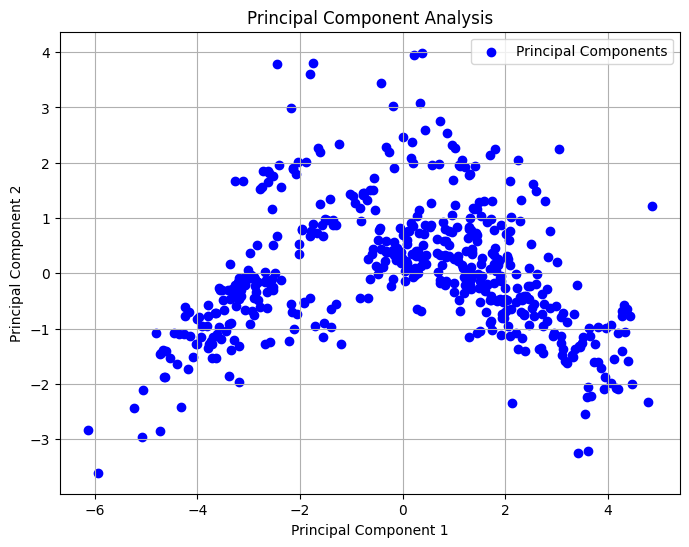

In [87]:
#7. Plot two principal components
PC1 = pca_dataframe["PC1"]
PC2 = pca_dataframe["PC2"]

plt.figure(figsize=(8, 6))
plt.scatter(PC1, PC2, c='b', marker='o', label='Principal Components')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Principal Component Analysis")
plt.legend()
plt.grid()
plt.show()

In [88]:
#8. Vectorize features and target together for model development
# Create df for model development
model_df = assembler.transform(df).select("features",'medv')
model_df.show()

+--------------------+----+
|            features|medv|
+--------------------+----+
|[0.00632,18.0,2.3...|24.0|
|[0.02731,0.0,7.07...|21.6|
|[0.02729,0.0,7.07...|34.7|
|[0.03237,0.0,2.18...|33.4|
|[0.06905,0.0,2.18...|36.2|
|[0.02985,0.0,2.18...|28.7|
|[0.08829,12.5,7.8...|22.9|
|[0.14455,12.5,7.8...|27.1|
|[0.21124,12.5,7.8...|16.5|
|[0.17004,12.5,7.8...|18.9|
|[0.22489,12.5,7.8...|15.0|
|[0.11747,12.5,7.8...|18.9|
|[0.09378,12.5,7.8...|21.7|
|[0.62976,0.0,8.14...|20.4|
|[0.63796,0.0,8.14...|18.2|
|[0.62739,0.0,8.14...|19.9|
|[1.05393,0.0,8.14...|23.1|
|[0.7842,0.0,8.14,...|17.5|
|[0.80271,0.0,8.14...|20.2|
|[0.7258,0.0,8.14,...|18.2|
+--------------------+----+
only showing top 20 rows



In [101]:
#9. Split dataset into training and testing dataset
# Split the dataset into training and testing sets, using 70% train, 30% test
train_ratio = 0.7
test_ratio = 0.3

# Randomly split the dataset
train_data, test_data = model_df.randomSplit([train_ratio, test_ratio])

In [102]:
#10. Fit model for linear regression
# Create a LinearRegression model
lr = LinearRegression(featuresCol="features", labelCol="medv")

# Fit the model using training data
lr_model = lr.fit(train_data)


In [103]:
#11. Find out model coefficients and intercept

print("The model coefficients: " + str(lr_model.coefficients))
print("The model intercept: " + str(lr_model.intercept))

The model coefficients: [-0.11557307442205396,0.04163724122597395,0.013199402537000336,3.0185778911895764,-18.248194922263732,3.695676463017183,0.010733820715130599,-1.3572633409796626,0.36927353725522893,-0.014389373028882583,-0.9013601490348693,0.008805333789441646,-0.6080928275555735]
The model intercept: 36.85232179613899


In [104]:
#12. Evaluate model for test dataset
# Make predictions on the testing data
predictions = lr_model.transform(test_data)
predictions.show()

+--------------------+----+------------------+
|            features|medv|        prediction|
+--------------------+----+------------------+
|[0.00632,18.0,2.3...|24.0|30.047477798691546|
|[0.00906,90.0,2.9...|32.2|31.018443101098946|
|[0.01096,55.0,2.2...|22.0|27.077621629684398|
|[0.01538,90.0,3.7...|44.0| 37.54838890731915|
|[0.01709,90.0,2.0...|30.1|26.417062805208303|
|[0.03041,0.0,5.19...|18.5| 19.79485322937898|
|[0.03113,0.0,4.39...|17.5|16.800452223967206|
|[0.0315,95.0,1.47...|34.9|29.745595069390006|
|[0.03237,0.0,2.18...|33.4|29.390634142829803|
|[0.03306,0.0,5.19...|20.6| 22.50918609928653|
|[0.03584,80.0,3.3...|23.5|30.195200260109658|
|[0.03615,80.0,4.9...|27.9| 31.83563266182503|
|[0.04113,25.0,4.8...|28.0| 28.65500722023023|
|[0.04294,28.0,15....|20.6| 27.00440064991304|
|[0.04462,25.0,4.8...|23.9|27.466746865488112|
|[0.04666,80.0,1.5...|30.3|32.094937539294925|
|[0.05188,0.0,4.49...|22.5|  21.9620977198512|
|[0.0536,21.0,5.64...|25.0| 27.94541963330295|
|[0.05425,0.0

In [105]:
#13. Perform further analysis for better interpretation of model results.
# Create a RegressionEvaluator for r2
r2_evaluator = RegressionEvaluator(
    labelCol="medv",
    predictionCol="prediction",
    metricName="r2"
)
# Calculate the r2
r2 = r2_evaluator.evaluate(predictions)
print(f"R-squared: {r2:.4f}")


# Create a RegressionEvaluator for mae
mae_evaluator = RegressionEvaluator(
    labelCol="medv",
    predictionCol="prediction",
    metricName="mae"
)
# Calculate the mae
mae = mae_evaluator.evaluate(predictions)

print(f"Mean Absolute Error: {mae:.4f}")


# Create a RegressionEvaluator for mse
mse_evaluator = RegressionEvaluator(
    labelCol="medv",
    predictionCol="prediction",
    metricName="mse"
)

# Calculate the mse
mse = mse_evaluator.evaluate(predictions)

print(f"Mean Squared Error: {mse:.4f}")


# Create a RegressionEvaluator for mse
rmse_evaluator = RegressionEvaluator(
    labelCol="medv",
    predictionCol="prediction",
    metricName="rmse"
)

# Calculate the mse
rmse = rmse_evaluator.evaluate(predictions)

print(f"Root Mean Squared Error: {rmse:.4f}")

R-squared: 0.7063
Mean Absolute Error: 3.4554
Mean Squared Error: 22.0947
Root Mean Squared Error: 4.7005


In [106]:
spark.stop()